# Linear Regression 

## import library

In [259]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [260]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

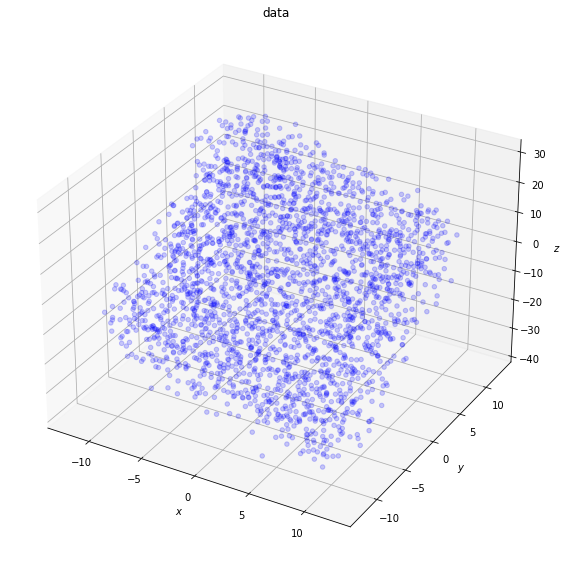

In [261]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [262]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====

    num_data = x.size
    
    one = np.ones(shape=(num_data,))
    X = np.column_stack((one, x, y))
    
    residual = z - np.dot(X, theta)
    
    # ============================
    return residual, num_data

In [263]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    # loss가 3개라 +=는 구현이 안됨
    
    residual, n = compute_residual(theta, x, y, z)
   
    loss = np.sum(np.square(residual)) / (2 * n)
    
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [264]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    n = x.size
    one = np.ones(shape=(n,))
    
    X = np.column_stack((one, x, y))
    XT = np.transpose(X)
    Xtheta = np.dot(X, theta)
    resi = Xtheta - z
    
    grad = np.dot(XT, resi) / n

    # ============================
    return grad

## gradient descent for each model parameter

In [265]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    
    theta = theta - learning_rate * compute_gradient(theta, xx, yy, zz)
    loss = compute_loss(theta, xx, yy, zz)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 46.08423
iteration =    1, loss = 25.70661
iteration =    2, loss = 17.25197
iteration =    3, loss = 13.71586
iteration =    4, loss = 12.20934
iteration =    5, loss = 11.54086
iteration =    6, loss = 11.21896
iteration =    7, loss = 11.04093
iteration =    8, loss = 10.92313
iteration =    9, loss = 10.83106
iteration =   10, loss = 10.75047
iteration =   11, loss = 10.67546
iteration =   12, loss = 10.60359
iteration =   13, loss = 10.53382
iteration =   14, loss = 10.46572
iteration =   15, loss = 10.39908
iteration =   16, loss = 10.33383
iteration =   17, loss = 10.26989
iteration =   18, loss = 10.20723
iteration =   19, loss = 10.14582
iteration =   20, loss = 10.08563
iteration =   21, loss = 10.02664
iteration =   22, loss = 9.96883
iteration =   23, loss = 9.91217
iteration =   24, loss = 9.85663
iteration =   25, loss = 9.80220
iteration =   26, loss = 9.74885
iteration =   27, loss = 9.69657
iteration =   28, loss = 9.64532
iteration =   29, los

iteration =  526, loss = 7.12156
iteration =  527, loss = 7.12155
iteration =  528, loss = 7.12155
iteration =  529, loss = 7.12155
iteration =  530, loss = 7.12155
iteration =  531, loss = 7.12155
iteration =  532, loss = 7.12154
iteration =  533, loss = 7.12154
iteration =  534, loss = 7.12154
iteration =  535, loss = 7.12154
iteration =  536, loss = 7.12154
iteration =  537, loss = 7.12153
iteration =  538, loss = 7.12153
iteration =  539, loss = 7.12153
iteration =  540, loss = 7.12153
iteration =  541, loss = 7.12153
iteration =  542, loss = 7.12153
iteration =  543, loss = 7.12152
iteration =  544, loss = 7.12152
iteration =  545, loss = 7.12152
iteration =  546, loss = 7.12152
iteration =  547, loss = 7.12152
iteration =  548, loss = 7.12152
iteration =  549, loss = 7.12152
iteration =  550, loss = 7.12151
iteration =  551, loss = 7.12151
iteration =  552, loss = 7.12151
iteration =  553, loss = 7.12151
iteration =  554, loss = 7.12151
iteration =  555, loss = 7.12151
iteration 

In [266]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [267]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    
    plt.plot(loss_iteration, '-', color = 'red')
    
    # ============================
    plt.tight_layout()
    plt.show()

In [268]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====

    ax.scatter3D(xx, yy, zz, color = 'blue')
    
    # ============================    
    plt.tight_layout()
    plt.show()

In [269]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    
    plt.plot(theta_iteration[:,0], '-', color = 'red')
    plt.plot(theta_iteration[:,1], '-', color = 'green')
    plt.plot(theta_iteration[:,2], '-', color = 'blue')

    # ============================
    plt.tight_layout()
    plt.show()

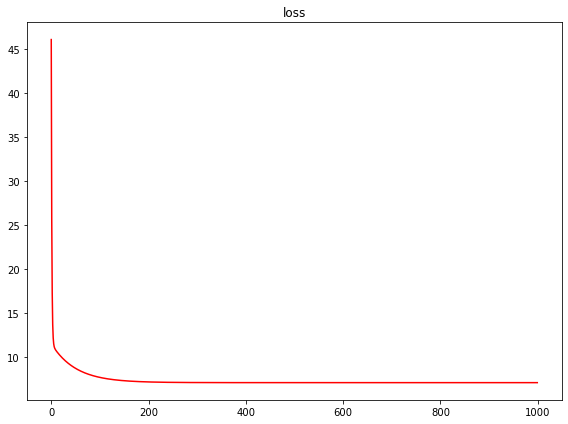

In [270]:
plot_loss_curve(loss_iteration)

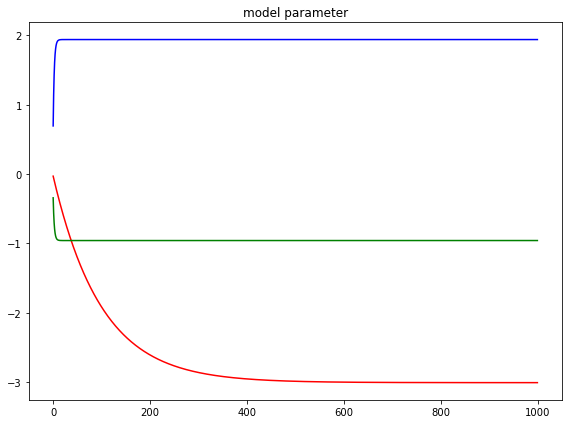

In [271]:
plot_model_parameter(theta_iteration)

In [272]:
# ===== FILL UP THE CODE =====
XX, YY = np.meshgrid(xx,yy)
ZZ = np.zeros((xx.size, yy.size))
ZZ = theta[0] + theta[1]*XX + theta[2]*YY
# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):
    
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====

    ax.scatter3D(xx, yy, zz, color = 'blue')
    
    ax.plot_surface(XX, YY, ZZ, cmap = 'hot')
    # ============================
    plt.tight_layout()
    plt.show()

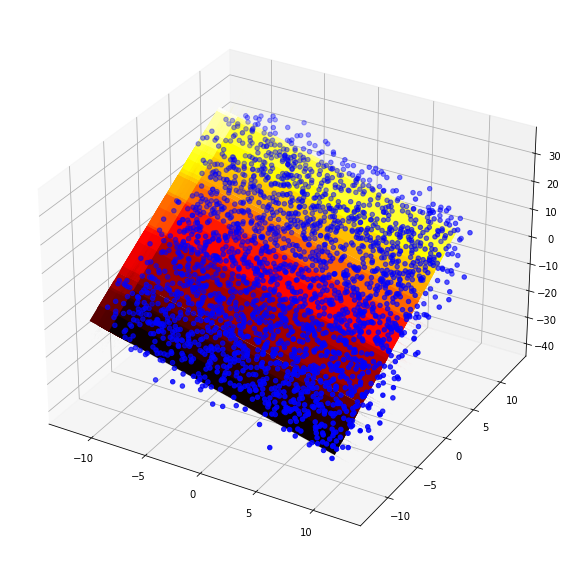

In [273]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

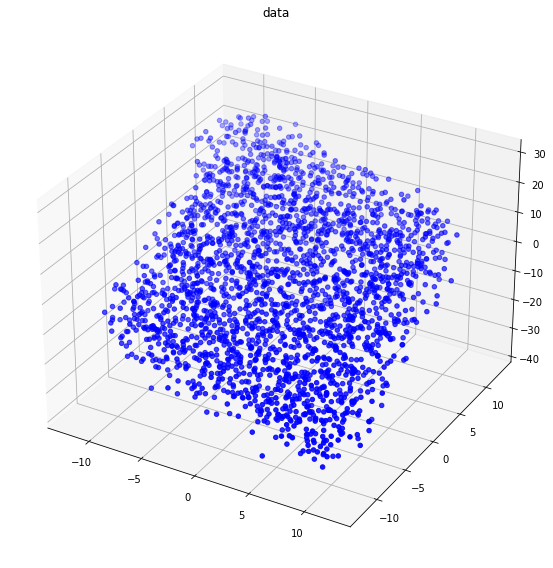

In [274]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

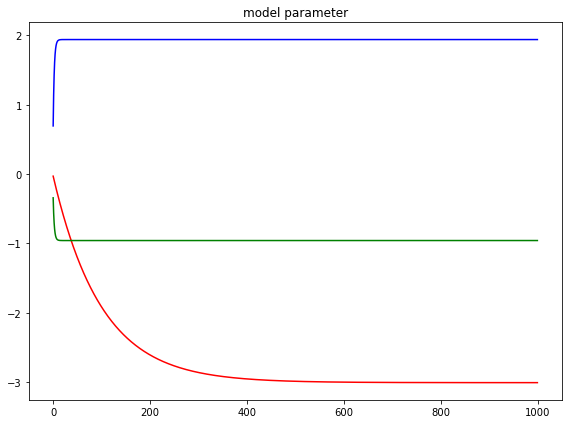

In [275]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

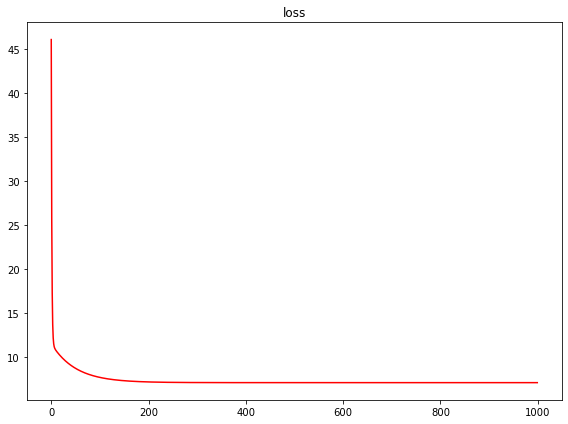

In [276]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

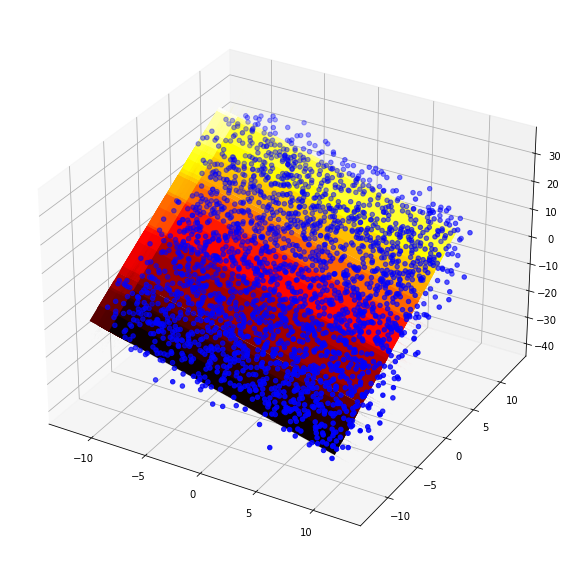

In [277]:
plot_surface(XX, YY, ZZ, xx, yy, zz)